In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# basic

In [2]:
data = [1,10,11,12,13,15,12,14,10,12,102,15,107,12,13,15,14,10,17,18,12,13,11,108,12,11,13,15,16,14,10,12,13,10,15]

In [3]:
np.mean(data), np.median(data), np.std(data)

(np.float64(20.514285714285716),
 np.float64(13.0),
 np.float64(26.23342625470841))

In [4]:
np.percentile(data, [0.3, 25, 50, 75, 95.4, 99.7])

array([  1.918,  11.5  ,  13.   ,  15.   , 104.18 , 107.898])

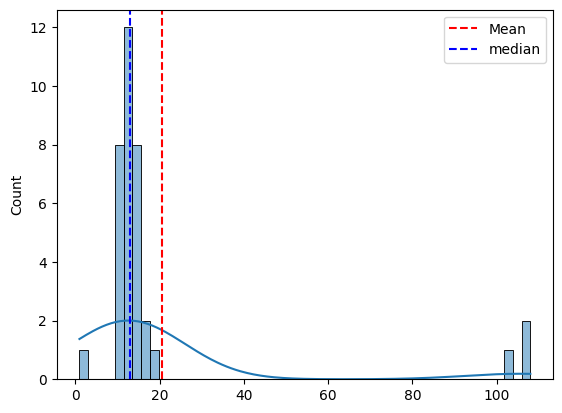

In [26]:
sns.histplot(data, kde=True)
plt.axvline(np.mean(data), c='r', linestyle='--', label='Mean')
plt.axvline(np.median(data), c='b', linestyle='--', label='median')
plt.legend()
plt.show()

# find Outliar

In [27]:
# find outliar
mean = np.mean(data)
std = np.std(data)
threshold = 3 # +- 3 std are outliar

outlier = []
for i in data:
    z_score = (i-mean)/std
    if np.abs(z_score) > threshold:
        outlier.append(i)

outlier

[102, 107, 108]

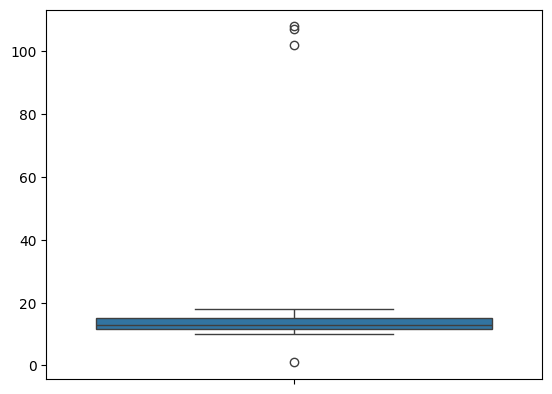

In [14]:
sns.boxplot(data)
plt.show()

In [15]:
Q1, Q3 = np.quantile(data, [0.25, 0.75]) 
IQR = Q3 - Q1
Q1, Q3, IQR

(np.float64(11.5), np.float64(15.0), np.float64(3.5))

In [16]:
lower_fence, upper_fence = (Q1-IQR*1.5), (Q3+IQR*1.5)
lower_fence, upper_fence

(np.float64(6.25), np.float64(20.25))

In [17]:
clean_data = []
for i in data:
    if i>upper_fence or i<lower_fence:
        print(i, end=" ")
    else:
        clean_data.append(i)

1 102 107 108 

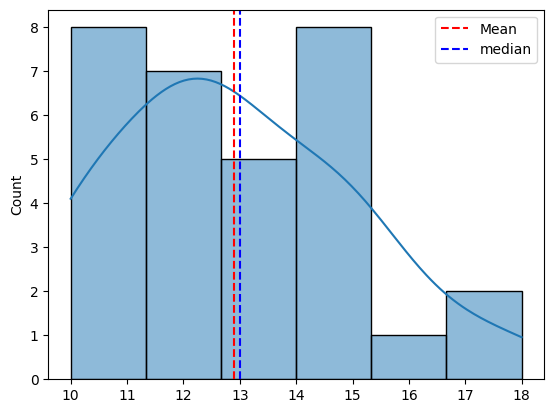

In [25]:
sns.histplot(clean_data, kde=True)
plt.axvline(np.mean(clean_data), c='r', linestyle='--', label='Mean')
plt.axvline(np.median(clean_data), c='b', linestyle='--', label='median')
plt.legend()
plt.show()

# Central Limit Theorem

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
dataset = np.random.randint(10, 100, 10000)
len(dataset)

10000

In [33]:
df = pd.DataFrame({"data":dataset})
df.head(3)

,data
0,90
1,30
2,67


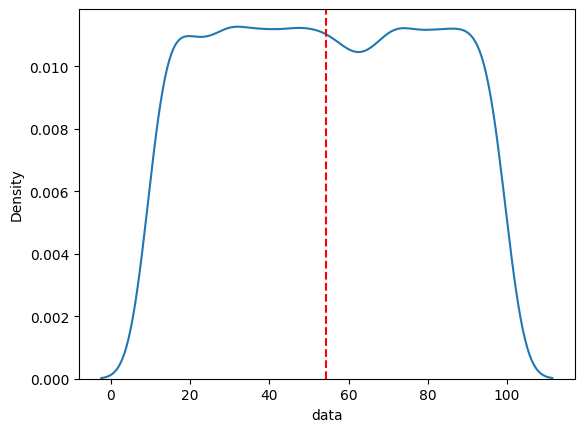

In [ ]:
sns.kdeplot(df.data) # density plot # check distribution is normal or not 
plt.axvline(df.data.mean(), c='r', linestyle='--')
plt.show()

In [53]:
# create samples and then find means of all samples
sample_mean = []
for s in range(50): # 50 sample make
    
    sample_data = []
    for i in range(500): # every sample have 500 len of data
        sample_data.append(np.random.choice(df.data))

    sample_mean.append(np.mean(sample_data))

In [54]:
sample_mean_df = pd.DataFrame({"sample_m": sample_mean})

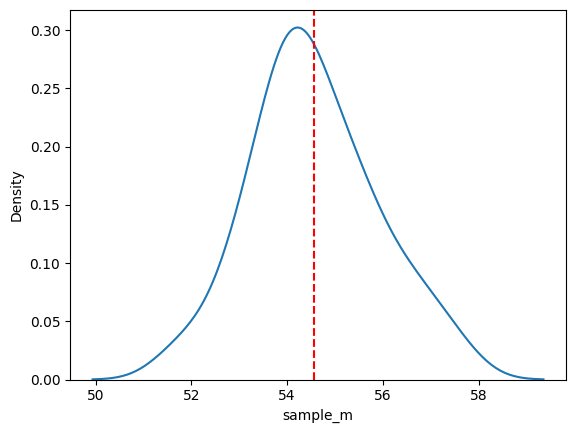

In [ ]:
sns.kdeplot(sample_mean_df.sample_m) # it's make simmilar to normal distribution
plt.axvline(sample_mean_df.sample_m.mean(), c='r', linestyle='--')
plt.show()

In [56]:
df.data.mean(), sample_mean_df.sample_m.mean()

(np.float64(54.4013), np.float64(54.56251999999999))

# Hypothesis

In [7]:
import scipy.stats as st
import numpy as np

In [5]:
mean = 82
std = 20
n = 81
x_mean = 90
a = 0.05

In [ ]:
z_val = st.norm.ppf(1-a) # if left side so enter (a) val elif right side so enter (1-a) val
print(z_val)

1.6448536269514722


In [11]:
z_test = (x_mean - mean) / (std /np.sqrt(n))
print(z_test)

3.5999999999999996


In [13]:
if z_val < z_test:
    print("ha right")
else:
    print("h0 right")

ha right


In [ ]:
# (a, df)
st.t.ppf(0.05, 24) # if left side so enter (a) val elif right side so enter (1-a) val

np.float64(-1.7108820799094282)

# Chi-Square Test

In [17]:
import pandas as pd
import numpy as np

In [46]:
data = pd.DataFrame({"gender": ["Male", "Female"],
                    "Pop": [40, 35],
                    "Hip Hop": [45, 30],
                    "Classical": [25, 20],
                    "Rock": [10, 30]
                    })

In [47]:
df = data.set_index("gender")
df

,Pop,Hip Hop,Classical,Rock
gender,,,,
Male,40,45,25,10
Female,35,30,20,30


In [82]:
n = 235
alpha = 0.05

In [81]:
# H0  ==> No association
# Ha ==> association

In [83]:
df = 3 # (row-1) * (col-1)
chi_val = 7.815

In [70]:
r1_sum, r2_sum = df.iloc[0].sum(), df.iloc[1].sum()
print(r1_sum, r2_sum)

120 115


In [72]:
c1_sum, c2_sum, c3_sum, c4_sum = df["Pop"].sum(), df["Hip Hop"].sum(), df["Classical"].sum(), df["Rock"].sum()
print(c1_sum, c2_sum, c3_sum, c4_sum)

75 75 45 40


In [73]:
r_arr = np.array([r1_sum, r2_sum])
c_arr = np.array([c1_sum, c2_sum, c3_sum, c4_sum])

In [77]:
# find expected value
exp = []
for i in r_arr:
    for j in c_arr:
        val = i*j/n
        exp.append(val)
exp = np.array(exp)
exp

array([38.29787234, 38.29787234, 22.9787234 , 20.42553191, 36.70212766,
       36.70212766, 22.0212766 , 19.57446809])

In [80]:
r1, r2 = df.iloc[0].values, df.iloc[1].values
obj = np.array([r1, r2]).flatten()
obj

array([40, 45, 25, 10, 35, 30, 20, 30])

In [84]:
chi_test = np.sum(((obj-exp)**2) / exp)
chi_test

np.float64(13.788747987117553)

In [85]:
chi_test > chi_val

np.True_

In [86]:
# Ha right ==> association

# using libraries

In [23]:
from statsmodels.stats.weightstats import ztest
from scipy.stats import ttest_1samp
import numpy as np

In [24]:
p_mean = 100
p_std = 15
n = 20
a = 0.05

data = [88, 92, 94, 94, 96, 97, 97, 97, 99, 99, 105, 109, 109, 109, 110, 112, 112, 113, 114, 115]

In [25]:
z_val, p_val = ztest(data, value=p_mean)

if a < p_val:
    print("Reject the null hypotesis.", p_val)
else:
    print("Accept the null hypotesis.", p_val)

Reject the null hypotesis. 0.11012667014384257


In [26]:
# T-test

data = [88, 92, 94, 94, 96, 97, 97, 97, 99, 99, 105, 109, 109, 109, 110, 112, 112, 113, 114, 115]
p_mean = np.mean(data)
p_std = np.std(data)

In [27]:
sample = np.random.choice(data, 10)
s_mean = np.mean(sample)
s_std = np.std(sample)

In [28]:
# Ho ==> p_mean == s_mean

In [29]:
t_test = ttest_1samp(sample, p_mean)

if a < t_test.pvalue:
    print("Reject the null hypotesis.", t_test.pvalue)
else:
    print("Accept the null hypotesis.", t_test.pvalue)

Reject the null hypotesis. 0.09437403762940538


# ----